# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Asaf 2980

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score , classification_report, accuracy_score
from sklearn.decomposition import PCA

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
file_name = 'wine_test.csv'
testDataset = pd.read_csv(file_name)
print("Test Dataset:")
testDataset.head()

Test Dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [3]:
file_name = 'wine_train.csv'
trainDataset = pd.read_csv(file_name)
print("Train Dataset:")
trainDataset.head()

Train Dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [4]:
stats_list = []
for col in trainDataset.columns:
        mean_val = trainDataset[col].mean()
        median_val = trainDataset[col].median()
        std_val = trainDataset[col].std()
        var_val = trainDataset[col].var()
        
        stats_list.append([mean_val, median_val, std_val, var_val])

stats_df = pd.DataFrame(stats_list, columns=['Mean', 'Median', 'Standard Deviation', 'Variance'], index=trainDataset.columns)

In [5]:
column_widths = {
    'Mean': '150px',
    'Median': '150px',
    'Standard Deviation': '150px',
    'Variance' : '150px'
}

# cividis = Blue to white to red, but more extreme
styled_df = stats_df.style.format("{:.2f}") \
                        .background_gradient(cmap="cividis") \
                        .set_table_styles({
                            'Mean': [{'selector': 'td', 'props': [('width', column_widths['Mean'])]}],
                            'Median': [{'selector': 'td', 'props': [('width', column_widths['Median'])]}],
                            'Standard Deviation': [{'selector': 'td', 'props': [('width', column_widths['Standard Deviation'])]}],
                            'Variance': [{'selector': 'td', 'props': [('width', column_widths['Variance'])]}]
                        })

styled_df

,Mean,Median,Standard Deviation,Variance
alcohol,13.00,13.05,0.79,0.62
malic_acid,2.30,1.87,1.09,1.20
ash,2.36,2.36,0.28,0.08
alcalinity_of_ash,19.42,19.25,3.35,11.25
magnesium,99.94,98.00,13.68,187.25
total_phenols,2.32,2.38,0.64,0.41
flavanoids,2.06,2.16,1.01,1.01
nonflavanoid_phenols,0.35,0.32,0.12,0.01
proanthocyanins,1.56,1.50,0.54,0.29
color_intensity,5.03,4.80,2.24,5.02


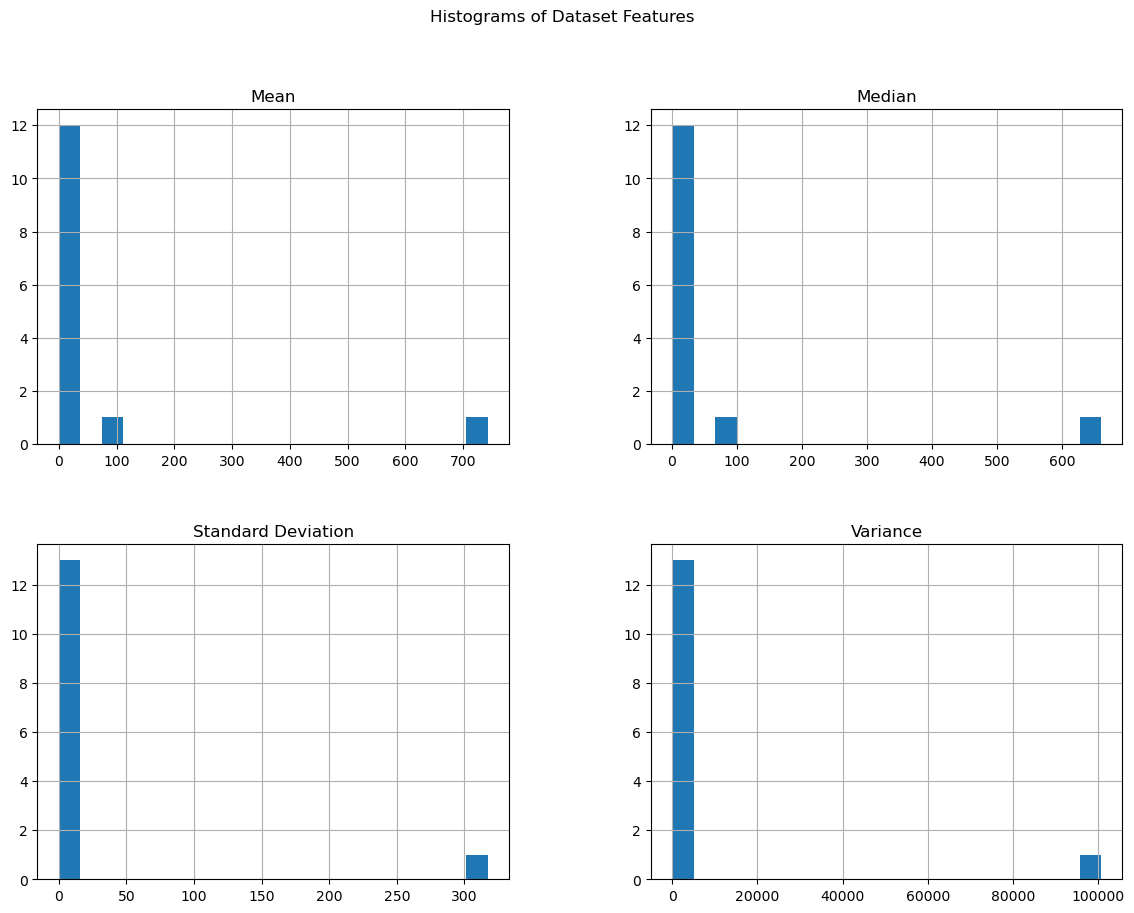

In [6]:
stats_df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Dataset Features')
plt.show()

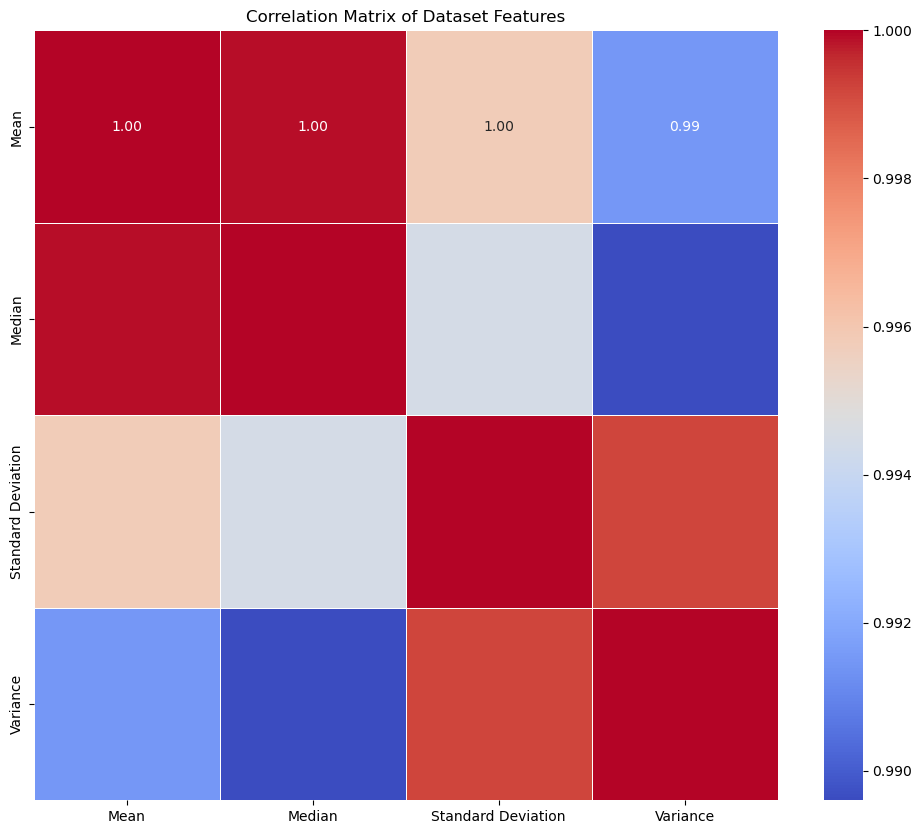

In [7]:
corr = stats_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, cbar=True)
plt.title('Correlation Matrix of Dataset Features')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [8]:
# פיתוח המודלים ללא 
# PCA

In [9]:
# הגדרת פרמטרים עבור כל הניסויים השונים

X_train = trainDataset.drop(columns=['target'])
y_train = trainDataset['target']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# הגדרת הפרמטרים לכל מודל

param_grid_random_forest_classifier = {
    'n_estimators': [10, 50, 100], # מספר העצים במאגר היער
    'max_depth': [None, 10, 20, 30], #  העומק המרבי של כל עץ ביער.
    'min_samples_split': [2, 5, 10] # מספר הדגימות המינימלי שנדרש כדי לפצל צומת.
}

param_grid_logistic_regression = {
    'C': [0.1, 1, 10], # פרמטר קבוע שמווסת את הכוח של רגולריזציה.
    'penalty': ['l2'], # סוג הרגולריזציה שמוחלת על המודל. 
    'solver': ['lbfgs'] # האלגוריתם שמשתמשים בו לפתרון הבעיה. 
                        # lbfgs
                        #  הוא סולבר בגרדיאנט-אסנט שמציע ביצועים טובים על רוב הבעיות.
}

param_grid_support_vector_classification = {
    'C': [0.1, 1, 10], # פרמטר קבוע שמווסת את העדיפות בין מיקסום המרווח בין הקטגוריות לבין טעות בקירוב.
    'gamma': [0.01, 0.1, 1], # פרמטר שמווסת את השפעת התמונות היחידניות על החלטת התוצאה.
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], # סוג הפונקציה הגרעינית שמשתמשים בה כדי לחשב את הפונקציה הייחודית בין הדגימות.
    'degree': [2, 3, 4],  # רק עבור גרעין פולינומיאלי. זהו דרגת הפולינום המשמשת כדי לחשב את המרחק בין הדגימות
    'coef0': [0, 0.1, 1]  # רק עבור גרעין פולינומיאלי וסיגמויד. זהו פרמטר שמווסת את ההשפעה של הרגולריזציה מול הפונקציה הגרעינית
}

param_grid_k_neighbors_classifier = {
    'n_neighbors': [5, 10, 15], # מספר השכנים הקרובים ביותר שיש לקחת בחשבון לצורך חיזוי
    'weights': ['uniform', 'distance'] #  סוג המשקלות שיש להחיל על השכנים. 
}


column_widths = {
    'Model': '150px',
    'Best Parameters': '300px',  # Adjust width if necessary for the parameters
    'Best f1_macro Score': '150px'
}

In [10]:
#  CROSS VALIDATION 
#  NO PCA
#  random_state=42 הוספת 
#  כדי להבטיח עקביות בתוצאות
#  "42... there's just something about this number"
grid_search_random_forest_classifier = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_random_forest_classifier, cv=5, scoring='f1_macro')
grid_search_logistic_regression = GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=42), param_grid=param_grid_logistic_regression, cv=5, scoring='f1_macro') 
grid_search_support_vector_classification = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid_support_vector_classification, cv=5, scoring='f1_macro')
grid_search_k_neighbors_classifier = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_k_neighbors_classifier, cv=5, scoring='f1_macro')

# התאמת המודלים
grid_search_random_forest_classifier.fit(X_train_scaled, y_train)
grid_search_logistic_regression.fit(X_train_scaled, y_train)
grid_search_support_vector_classification.fit(X_train_scaled, y_train)
grid_search_k_neighbors_classifier.fit(X_train_scaled, y_train)

# אוסף התוצאות
results_no_pca = {
    'Model': ['RandomForest', 'LogisticRegression', 'SVM', 'KNeighbors'],
    'Best Parameters': [
        grid_search_random_forest_classifier.best_params_,
        grid_search_logistic_regression.best_params_,
        grid_search_support_vector_classification.best_params_,
        grid_search_k_neighbors_classifier.best_params_
    ],
    'Best f1_macro Score': [
        grid_search_random_forest_classifier.best_score_,
        grid_search_logistic_regression.best_score_,
        grid_search_support_vector_classification.best_score_,
        grid_search_k_neighbors_classifier.best_score_
    ]
}

results_no_pca_df  = pd.DataFrame(results_no_pca)

In [11]:
# Convert 'Best f1_macro Score' to numeric if necessary
results_no_pca_df ['Best f1_macro Score'] = pd.to_numeric(results_no_pca_df ['Best f1_macro Score'], errors='coerce')

# Apply styles to the DataFrame
styled_results_no_pca_df = results_no_pca_df .style.format({
    'Best f1_macro Score': "{:.4f}"  # Format the f1_macro score to 4 decimal places
}) \
    .background_gradient(cmap="coolwarm", subset=['Best f1_macro Score']) \
    .set_table_styles({
        'Model': [{'selector': 'th.col0', 'props': [('width', column_widths['Model'])]}],
        'Best Parameters': [{'selector': 'th.col1', 'props': [('width', column_widths['Best Parameters'])]}],
        'Best f1_macro Score': [{'selector': 'th.col2', 'props': [('width', column_widths['Best f1_macro Score'])]}]
    })

# Display the styled DataFrame
print("The styled results no pca df: ")
styled_results_no_pca_df 

The styled results no pca df: 


,Model,Best Parameters,Best f1_macro Score
0,RandomForest,"{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}",0.9790
1,LogisticRegression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.9787
2,SVM,"{'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.9796
3,KNeighbors,"{'n_neighbors': 10, 'weights': 'uniform'}",0.9650


In [12]:
#  CROSS VALIDATION 
#  PCA 

pca = PCA(n_components=0.95)  # שמירת 95% מהשונות

# יצירת pipeline הכוללת סקיילינג ו-PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # נרמול תכונות
    ('pca', pca),  # הקטנת מימדים
])

# התאמה והמרת נתוני האימון
X_train_pca = pipeline.fit_transform(X_train)

# הגדרת 
# Grid Search 
# עבור כל מודל
grid_search_random_forest_classifier = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_random_forest_classifier, cv=5, scoring='f1_macro')
grid_search_logistic_regression = GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=42), param_grid=param_grid_logistic_regression, cv=5, scoring='f1_macro')
grid_search_support_vector_classification = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid_support_vector_classification, cv=5, scoring='f1_macro')
grid_search_k_neighbors_classifier = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_k_neighbors_classifier, cv=5, scoring='f1_macro')

# התאמת המודלים על נתונים עם 
# PCA
grid_search_random_forest_classifier.fit(X_train_pca, y_train)
grid_search_logistic_regression.fit(X_train_pca, y_train)
grid_search_support_vector_classification.fit(X_train_pca, y_train)
grid_search_k_neighbors_classifier.fit(X_train_pca, y_train)

results_pca  = {
    'Model': ['RandomForest', 'LogisticRegression', 'SVM', 'KNeighbors'],
    'Best Parameters': [
        grid_search_random_forest_classifier.best_params_,
        grid_search_logistic_regression.best_params_,
        grid_search_support_vector_classification.best_params_,
        grid_search_k_neighbors_classifier.best_params_
    ],
    'Best f1_macro Score': [
        grid_search_random_forest_classifier.best_score_,
        grid_search_logistic_regression.best_score_,
        grid_search_support_vector_classification.best_score_,
        grid_search_k_neighbors_classifier.best_score_
    ]
}

results_pca_df = pd.DataFrame(results_pca)

In [13]:
styled_results_pca_df = results_pca_df.style.format({
    'Best f1_macro Score': "{:.5f}"
}).background_gradient(cmap="Purples", subset=['Best f1_macro Score']) \
    .set_table_styles({
        'Model': [{'selector': 'th.col0', 'props': [('width', column_widths['Model'])]}],
        'Best Parameters': [{'selector': 'th.col1', 'props': [('width', column_widths['Best Parameters'])]}],
        'Best f1_macro Score': [{'selector': 'th.col2', 'props': [('width', column_widths['Best f1_macro Score'])]}]
    })

# הצגת ה-DataFrame המעוצב
print("The styled results pca df: ")
styled_results_pca_df


The styled results pca df: 


,Model,Best Parameters,Best f1_macro Score
0,RandomForest,"{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}",0.97285
1,LogisticRegression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.97173
2,SVM,"{'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.97897
3,KNeighbors,"{'n_neighbors': 15, 'weights': 'uniform'}",0.97173


In [14]:
print("styled_results_no_pca_df")
styled_results_no_pca_df

styled_results_no_pca_df


,Model,Best Parameters,Best f1_macro Score
0,RandomForest,"{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}",0.9790
1,LogisticRegression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.9787
2,SVM,"{'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.9796
3,KNeighbors,"{'n_neighbors': 10, 'weights': 'uniform'}",0.9650


In [15]:
print("Random Forest : הסבר")
print("The RandomForestClassifier is an ensemble learning method that combines multiple decision trees to improve classification performance.") 
print("It works by constructing a multitude of decision trees during training and outputting the class that is the majority vote of the classes from individual trees.")
print("The randomness in selecting subsets of data and features for each tree helps in making the model robust and less prone to overfitting.")

print("\nRandom Forest מודל")
print("אלגוריתם למידת מכונה שמשתמש בקבוצה של עצי החלטה")
print("כדי לשפר את ביצועי המודל ולמנוע")
print("overfitting")
print("כל עץ יוצר תחזיות עצמאיות, והתחזיות משולבות כדי לקבל את התוצאה הסופית.")

Random Forest : הסבר
The RandomForestClassifier is an ensemble learning method that combines multiple decision trees to improve classification performance.
It works by constructing a multitude of decision trees during training and outputting the class that is the majority vote of the classes from individual trees.
The randomness in selecting subsets of data and features for each tree helps in making the model robust and less prone to overfitting.

Random Forest מודל
אלגוריתם למידת מכונה שמשתמש בקבוצה של עצי החלטה
כדי לשפר את ביצועי המודל ולמנוע
overfitting
כל עץ יוצר תחזיות עצמאיות, והתחזיות משולבות כדי לקבל את התוצאה הסופית.


In [16]:
# מציאת המודל עם התוצאה הטובה ביותר ללא 
# PCA
best_no_pca_model_index = results_no_pca_df['Best f1_macro Score'].idxmax()
best_no_pca_model = results_no_pca_df.iloc[best_no_pca_model_index]
print("Best Model Without PCA:")
print(best_no_pca_model)
print("\n")

# מציאת המודל עם התוצאה הטובה ביותר עם 
# PCA
best_pca_model_index = results_pca_df['Best f1_macro Score'].idxmax()
best_pca_model = results_pca_df.iloc[best_pca_model_index]
print("Best Model With PCA:")
print(best_pca_model)
print("\n")

# ניתוח השפעת 
# PCA
# על הביצועים
no_pca_best_score = best_no_pca_model['Best f1_macro Score']
pca_best_score = best_pca_model['Best f1_macro Score']
print(f"Best f1_macro Score without PCA: {no_pca_best_score:.5f}\n")
print(f"Best f1_macro Score with PCA: {pca_best_score:.5f}\n")


if pca_best_score > no_pca_best_score:
    print("PCA improved the performance.")
    result_model_after_pca = best_pca_model
else:
    print("PCA did not improve the performance.")
    result_model_after_pca = best_no_pca_model


Best Model Without PCA:
Model                                                                SVM
Best Parameters        {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.0...
Best f1_macro Score                                             0.979637
Name: 2, dtype: object


Best Model With PCA:
Model                                                                SVM
Best Parameters        {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.0...
Best f1_macro Score                                             0.978968
Name: 2, dtype: object


Best f1_macro Score without PCA: 0.97964

Best f1_macro Score with PCA: 0.97897

PCA did not improve the performance.


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [17]:
best_params = result_model_after_pca['Best Parameters']

print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [18]:
# אימון המודל

# הכנת הנתונים
X_train = trainDataset.drop('target', axis=1)
y_train = trainDataset['target']


# אתמחול המודל עם הפרמטרים הכי טובים שמצאנו קודם
model = SVC(C=best_params['C'], coef0=best_params['coef0'],
            degree=best_params['degree'], gamma=best_params['gamma'],
            kernel=best_params['kernel'])

# יצירת 
# Pipeline
# עם נירמול הנתונים
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # נירמול הנתונים
    ('classifier', model)          # המודל שלנו
])

# אימון המודל מחדש על כל סט האימון
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 SVC(C=1, coef0=0, degree=2, gamma=0.01, kernel='sigmoid'))])

## Part 5 - Apply on test and show model performance estimation

In [19]:
# ניבוי תוצאות

# הכנת הנתונים לסט הבדיקה
X_test = testDataset.drop('target', axis=1)
y_test = testDataset['target']

# ניבוי תוצאות על סט הבדיקה
y_pred = pipeline.predict(X_test)

# הצגת תוצאות החיזוי של 5 הדוגמאות הראשונות
print("First 5 Predictions:", y_pred[:5])

# חישוב תוצאות ה
# F1 Macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1 Macro Score on Test Set: {f1_macro:.4f}")


First 5 Predictions: [2 0 2 1 2]
F1 Macro Score on Test Set: 0.9732


In [20]:
# יצירת 
# DataFrame
# להצגת החיזויים מול התוצאות האמיתיות
results_df = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': y_pred
})

# הצגת 5 הדוגמאות הראשונות
print(results_df.head())


   True Values  Predicted Values
0            2                 2
1            0                 0
2            2                 2
3            1                 1
4            2                 2


In [21]:
# הדפסת דוח הסיווג
print("Classification Report:")
print(classification_report(y_test, y_pred))

# חישוב והדפסת הדיוק
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Accuracy: 97.22%
